# I. Inflection Point Detection

## 1. Noise Reduction
* **scipy.ndimage**: signal aceraging, median
* **np.hanning, np.hamming, np.bartlett, np.blackman**: smoothing of a 1D signal
* **scipy.signal.savgol_filter**: noisy signal smoothing

## 2. Clustering
* **sklearn.cluster.DBSCAN**: unsupervised clustering

## 3. Visualization
* **r'$ LaTeX_expr $'**: matplotlib에서 LaTeX 표현
* **matplotlib.axes.Axes.axhline**: 수평선 그리기
* **matplotlib.axes.Axes.inset_axes**: matplotlib plot에 inset 삽입
* **matplotlib.axes.Axes.fill_between**: matplotlib plot중 조건에 맞는 구간 칠하기

### 1. Project Preparation

### 1.1 Import libaries

In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import sklearn as skl
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

### 1.2 Korean font setting

In [3]:
f = [f.name for f in fm.fontManager.ttflist if 'Nanum' in f.name]
f

[]

In [3]:
plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 20

### 1.3 Visualization setting

In [4]:
plt.style.use('seaborn-whitegrid')
sns.set_context('talk')
%matplotlib inline

### 2. Load Data

### 2.1 데이터 불러와서 합치기

In [4]:
os.chdir('D:/통행발생/trafficdist_seoul/o_weekdays/boxplot_ddply/type_gender_age_time_traffic_dist')

In [12]:
dtf = pd.read_csv("time_traffic_dist.csv")
less_2 = dtf[dtf['dist'] <= 0.36]

In [13]:
less_2.head()

,V3,dist,traffic
0,0,0.102196,5987
1,0,0.121123,902
2,0,0.131040,1488
3,0,0.132342,1117
4,0,0.134875,123


In [14]:
max(less_2['dist'])

0.35996495339855

Text(0.5, 1.0, '24')

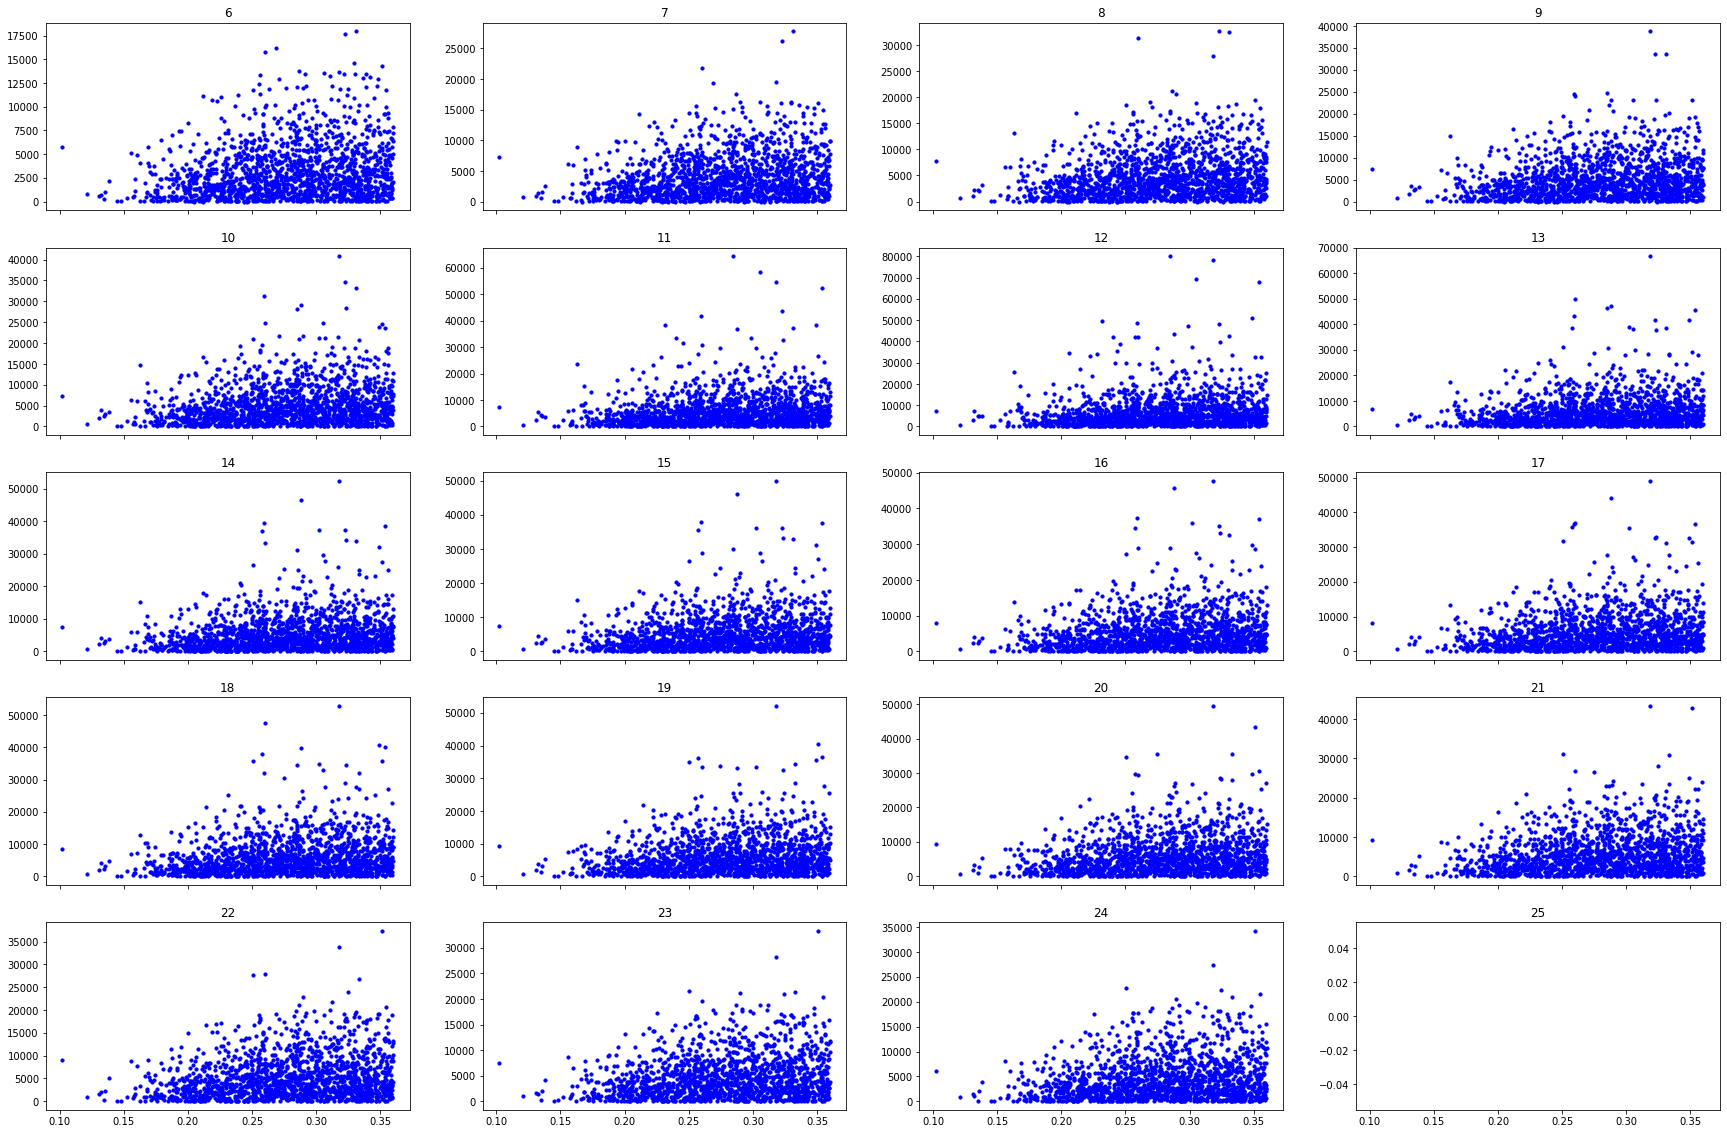

In [19]:
fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(30, 20), sharex=True)

v3 = 6
for i in range(0, 5):
    for j in range(0,4):
        tmp = less_2[less_2['V3'] == v3]
        ax[i][j].scatter(tmp['dist'], tmp['traffic'], s=10, c='b')
        ax[i][j].set_title(str(v3))
        v3 += 1
tmp = less_2[less_2['V3'] == 0]
ax[4][2].scatter(tmp['dist'], tmp['traffic'], c='b', s=10)
ax[4][2].set_title(24)

In [10]:
dtf2 = pd.read_csv("age_traffic_dist.csv")


In [11]:
dtf2

,V9,dist,traffic
0,20,0.102196,29774
1,20,0.121123,4420
2,20,0.131040,11491
3,20,0.132342,14434
4,20,0.134875,7926
...,...,...,...
10438764,50,496.494427,3
10438765,50,496.562168,3
10438766,50,496.686670,3
10438767,50,497.312848,3


In [12]:
less_22 = dtf2[dtf2['dist'] <= 2]

In [13]:
less_22['dist_round'] = less_22['dist'].apply(cat3)

NameError: name 'cat3' is not defined

In [ ]:
fig, ax = plt.subplots(nrows=4, figsize=(30, 30), sharex=True)

v3 = 20
for i in range(0, 4):
    tmp = less_22[less_22['V9'] == v3]
    ax[i].plot(tmp['dist_round'], tmp['traffic'])
    ax[i].set_title(str(v3))
    v3 += 10
        

In [ ]:
dtf3 = pd.read_csv("gender_age_traffic_dist.csv")


In [ ]:
less_23 = dtf3[dtf3['dist'] <= 5]
less_23['dist_round'] = less_23['dist'].apply(cat3)

In [ ]:
less_23

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols = 2, figsize=(30, 20), sharex=True)

v3 = 20
for i in range(0, 4):
    tmpf = less_23[(less_23['V9'] == v3) & (less_23['V10'] == 'F')]
    tmpm = less_23[(less_23['V9'] == v3) & (less_23['V10'] == 'M')]
    ax[i][0].plot(tmpf['dist_round'], tmpf['traffic'])
    ax[i][0].set_title('F' + str(v3))
    ax[i][1].plot(tmpm['dist_round'], tmpm['traffic'])
    ax[i][1].set_title('M' + str(v3))
    v3 += 10
        

In [ ]:
dtf.info()

In [ ]:
dtf.drop('Unnamed: 0', axis=1)

### 2.2 Plot: Raw Data

In [131]:
dtf = pd.read_csv('dist_traffic_all.csv')

In [132]:
dtf_g = dtf[dtf['dist']>0.32]
dtf_g.to_csv('dtf_gravity.csv')

In [133]:
dtf

,Unnamed: 0,dist,traffic,travel_dist,dist_round
0,0,0.102196,147042,dong,0.10
1,1,0.168199,154176,dong,0.17
2,2,0.174074,151236,dong,0.17
3,3,0.191032,45315,dong,0.19
4,4,0.193362,196133,dong,0.19
...,...,...,...,...,...
5022198,3803243,497.260542,3,sioe,497.26
5022199,3803244,497.312848,3,sioe,497.31
5022200,3803245,497.320076,3,sioe,497.32
5022201,3803246,500.511005,6,sioe,500.51


In [134]:
dtf.drop('Unnamed: 0', axis=1)

,dist,traffic,travel_dist,dist_round
0,0.102196,147042,dong,0.10
1,0.168199,154176,dong,0.17
2,0.174074,151236,dong,0.17
3,0.191032,45315,dong,0.19
4,0.193362,196133,dong,0.19
...,...,...,...,...
5022198,497.260542,3,sioe,497.26
5022199,497.312848,3,sioe,497.31
5022200,497.320076,3,sioe,497.32
5022201,500.511005,6,sioe,500.51


In [172]:
sample = dtf[dtf['dist']<30]
sample2 = dtf[dtf['dist']<6]
sample3 = dtf[dtf['dist']<2]

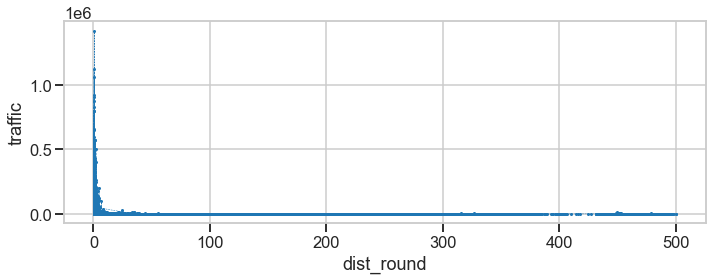

In [136]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(dtf['dist'], dtf['traffic'], marker = "o", linestyle= "--", linewidth = 0.5, markersize = 2)
ax.set_xlabel('dist_round')
ax.set_ylabel('traffic')

plt.tight_layout()

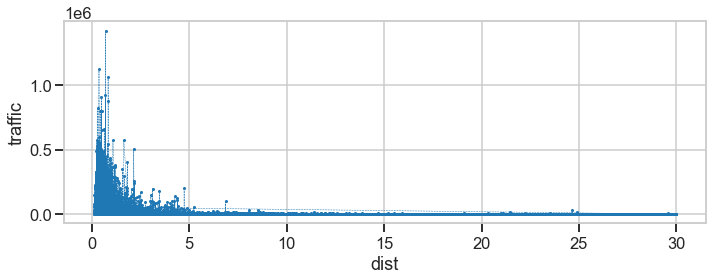

In [137]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(sample['dist'], sample['traffic'], marker = "o", linestyle= "--", linewidth = 0.5, markersize = 2)
ax.set_xlabel('dist')
ax.set_ylabel('traffic')

plt.tight_layout()

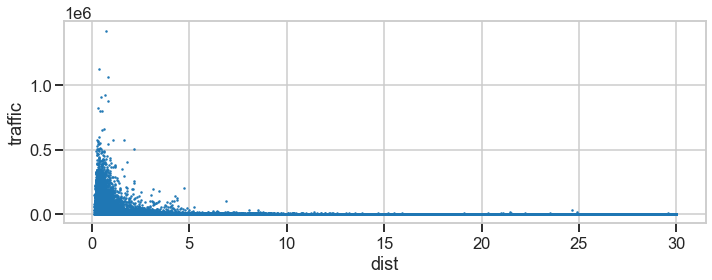

In [138]:
fig, ax = plt.subplots(figsize=(10,4))
ax.scatter(sample['dist'], sample['traffic'], s=1)
ax.set_xlabel('dist')
ax.set_ylabel('traffic')

plt.tight_layout()

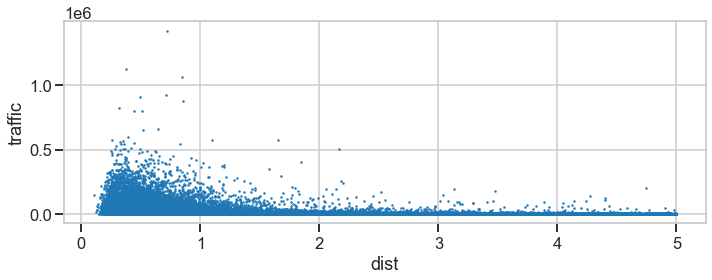

In [139]:
fig, ax = plt.subplots(figsize=(10,4))
ax.scatter(sample2['dist'], sample2['traffic'], s=1)
ax.set_xlabel('dist')
ax.set_ylabel('traffic')

plt.tight_layout()

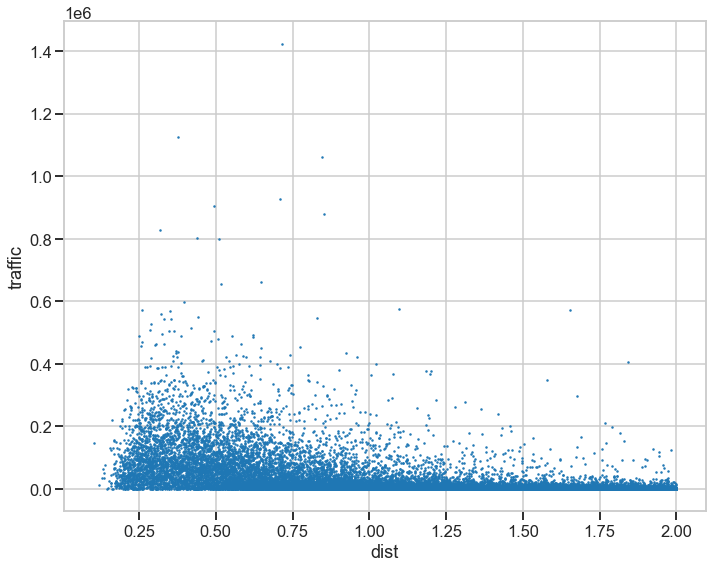

In [140]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(sample3['dist'], sample3['traffic'], s=1)
ax.set_xlabel('dist')
ax.set_ylabel('traffic')

plt.tight_layout()

### 2.3 Categorization

In [141]:
def cat(dist):
    dist = round(dist, 2)
    return dist

def cat2(dist):
    dist = round(dist, 1)
    return dist

def cat3(dist):
    dist = round(dist, 3)
    return dist

def cat4(dist):
    dist = round(dist, 4)
    return dist

In [145]:
sample3['dist_round3'] = sample3['dist'].apply(cat3)

C:\Users\ekqls\AppData\Local\Temp\ipykernel_16680\201422449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample3['dist_round3'] = sample3['dist'].apply(cat3)


In [143]:
sample3['dist_round2'] = sample3['dist'].apply(cat2)

C:\Users\ekqls\AppData\Local\Temp\ipykernel_16680\2899820458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample3['dist_round2'] = sample3['dist'].apply(cat2)


In [152]:
sample3['travel_dist'].value_counts()

gu         20563
sinae      11897
dong        3118
polygon     1421
sioe        1028
Name: travel_dist, dtype: int64

In [147]:
sample3.to_csv('3자리.csv')

### 2.4 Plot: Categorized Data

C:\Users\ekqls\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


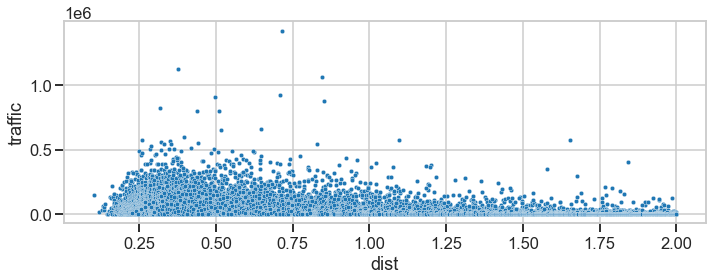

In [148]:
fig, ax = plt.subplots(figsize=(10,4))
sns.scatterplot(sample3['dist_round3'], sample3['traffic'], s=20)
ax.set_xlabel('dist')
ax.set_ylabel('traffic')

plt.tight_layout()

In [153]:
def zone(data):
    if data == "polygon":
        return "Intra-zonal Travel"
    else:
        return "zonal Travel"

In [154]:
sample3['travel_dist2'] = sample3['travel_dist'].apply(zone)


C:\Users\ekqls\AppData\Local\Temp\ipykernel_16680\2201161284.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample3['travel_dist2'] = sample3['travel_dist'].apply(zone)


In [156]:
sample3['travel_dist2'].value_counts()

zonal Travel          36606
Intra-zonal Travel     1421
Name: travel_dist2, dtype: int64

In [158]:
dtf['travel_dist2'] = dtf['travel_dist'].apply(zone)
dtf['travel_dist2'].value_counts()

zonal Travel          5020782
Intra-zonal Travel       1421
Name: travel_dist2, dtype: int64

In [174]:
sample2['travel_dist2'] = sample2['travel_dist'].apply(zone)
sample2['travel_dist2'].value_counts()

C:\Users\ekqls\AppData\Local\Temp\ipykernel_16680\661643342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample2['travel_dist2'] = sample2['travel_dist'].apply(zone)


zonal Travel          273879
Intra-zonal Travel      1421
Name: travel_dist2, dtype: int64

In [173]:
sample['travel_dist2'] = sample['travel_dist'].apply(zone)
sample['travel_dist2'].value_counts()

C:\Users\ekqls\AppData\Local\Temp\ipykernel_16680\569370864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['travel_dist2'] = sample['travel_dist'].apply(zone)


zonal Travel          2739643
Intra-zonal Travel       1421
Name: travel_dist2, dtype: int64

In [149]:
def label(x, color, label):
    ax = plt.gca() #get the axes of the current object
    ax.text(0, .2, #location of text
            label, #text label
            fontweight="bold", color=color, size=20, #text attributes
            ha="left", va="center", #alignment specifications
            transform=ax.transAxes) #specify axes of transformation

C:\Users\ekqls\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\ekqls\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\ekqls\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\ekqls\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is depr

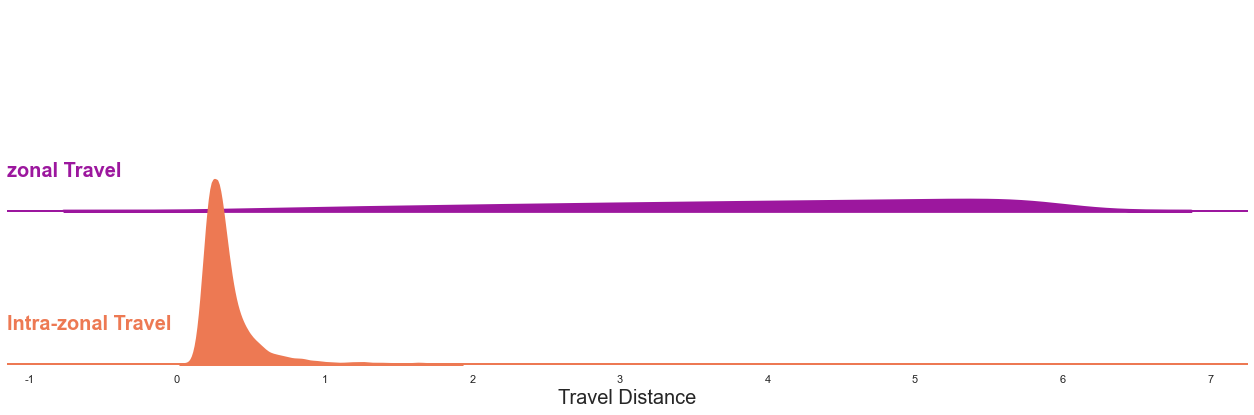

In [175]:
g = sns.FacetGrid(sample2, #the dataframe to pull from
                  row='travel_dist2', #define the column for each subplot row to be differentiated by
                  hue='travel_dist2', #define the column for each subplot color to be differentiated by
                  aspect=6, #aspect * height = width
                  height=3, #height of each subplot
                  palette='plasma' #google colors
                 )
g.map(sns.kdeplot, "dist", shade=True, alpha=1, lw=1.5, bw=0.2)
g.map(sns.kdeplot, "dist", lw=4, bw=0.2)
g.map(plt.axhline, y=0, lw=4)
g.map(label, "dist") #the function counts as a plotting object!
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
g.fig.subplots_adjust(hspace= -.25)
g.set_titles("") #set title to blank
g.set_ylabels("") #set y ticks to blank
g.set_yticklabels([])
g.set_xlabels("Travel Distance", fontsize=20)
g.despine(bottom=True, left=True) #remove 'spines'

In [34]:
ddply = pd.read_csv('dist_traffic_ddply.csv')

In [35]:
ddply

,dist_round,traffic
0,0.10,147042
1,0.12,13570
2,0.13,136320
3,0.14,130801
4,0.15,26213
...,...,...
41111,497.26,3
41112,497.31,3
41113,497.32,3
41114,500.51,6


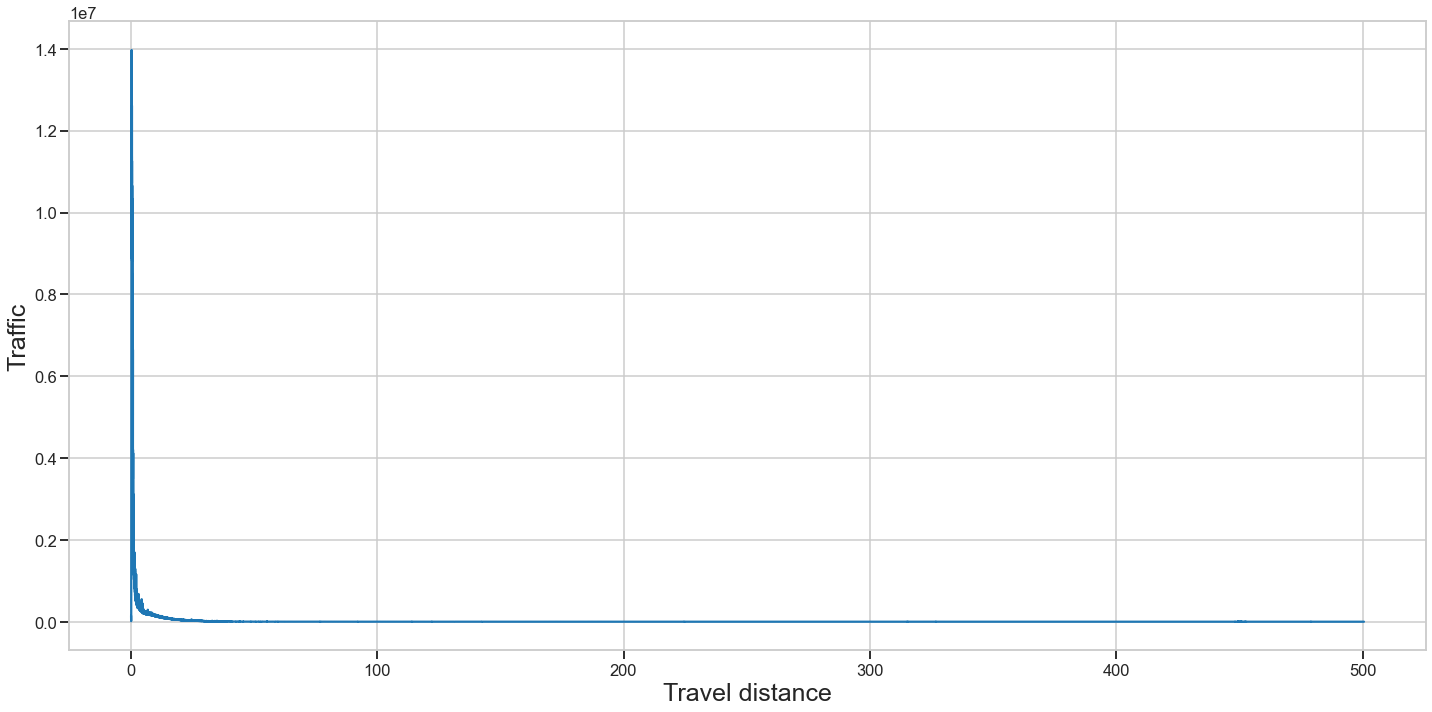

In [36]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(ddply['dist_round'], ddply['traffic'])
ax.set_xlabel('Travel distance', fontsize=25)
ax.set_ylabel('Traffic', fontsize=25)
plt.tight_layout()

In [37]:
df = ddply[ddply['dist_round'] <= 2]

In [38]:
df

,dist_round,traffic
0,0.10,147042
1,0.12,13570
2,0.13,136320
3,0.14,130801
4,0.15,26213
...,...,...
185,1.96,740278
186,1.97,827570
187,1.98,716848
188,1.99,601169


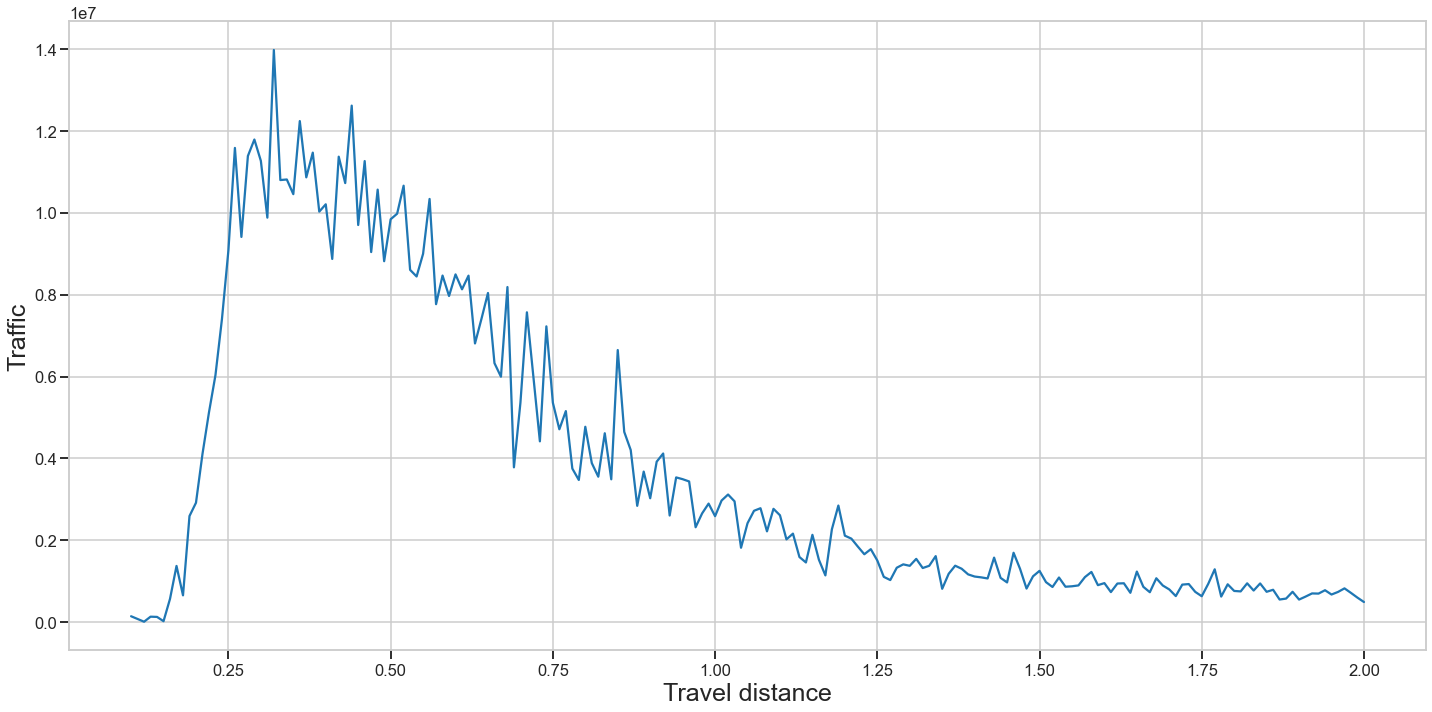

In [39]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(df['dist_round'], df['traffic'])
ax.set_xlabel('Travel distance', fontsize=25)
ax.set_ylabel('Traffic', fontsize=25)
plt.tight_layout()

In [40]:
df[df['traffic']==max(df['traffic'])]

,dist_round,traffic
21,0.32,13972110


### 3. Infelction Point Detection

### 3.1. 1,2,3계 도함수 계산

In [41]:
d1 = np.diff(df['traffic'])/np.diff(df['dist_round'])     #1계도함수
d2 = np.diff(d1)/np.diff(df['dist_round'].iloc[:-1])      #2계도함수
d3 = np.diff(d2)/np.diff(df['dist_round'].iloc[:-2])      #3계도함수

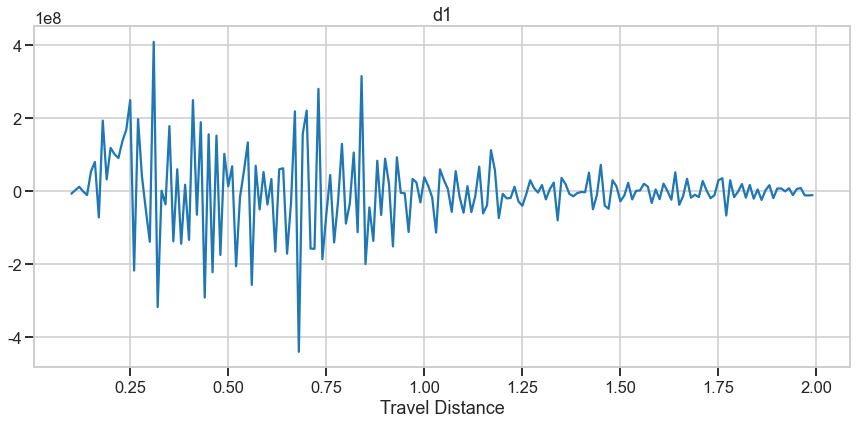

In [44]:
fig, ax = plt.subplots(ncols=1, figsize = (12,6))
ax.plot(df['dist_round'].iloc[:-1], d1)
# ax[1].plot(df['dist_round'].iloc[:-2], d2)
# ax[2].plot(df['dist_round'].iloc[:-3], d3)

ax.set_title('d1')
# ax[1].set_title('d2')
# ax[2].set_title('d3')

ax.set_xlabel('Travel Distance')
# ax[1].set_xlabel('Travel Distance')
# ax[2].set_xlabel('Travel Distance')

plt.tight_layout()

### 3.2. Noise Reduction

* 현재의 데이터는 노이즈가 너무 많아, 미분계수를 구하는 것이 의미가 없음
* 변곡점과 극점을 구하기 위해서는, 그래프가 매끈해야 함
* 따라서 그래프의 Noise를 줄여주는 작업이 필요

### 3.2.1. Average and Median

In [45]:
from scipy import ndimage

In [46]:
def average(raw, box_size):
    box = np.ones(box_size)/box_size
    raw_smooth = np.convolve(box, raw, mode='same')
    return raw_smooth

def median(raw, box_size):
    raw_smooth = ndimage.median_filter(raw, box_size)
    return raw_smooth


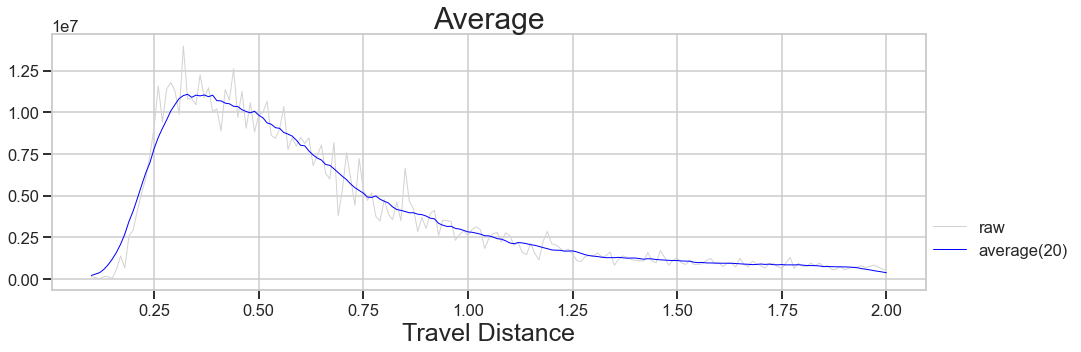

In [47]:
fig, ax = plt.subplots(ncols=1, figsize=(15,5))

raw_smooth = average(df['traffic'], 5)
raw_smooth2 = average(df['traffic'], 10)
raw_smooth3 = average(df['traffic'], 15)

ax.plot(df['dist_round'], df['traffic'], lw=1, c='lightgray', label='raw')
# ax.plot(df['dist_round'], raw_smooth, lw=1, c='#9999FF', label="average(5)")
# ax.plot(df['dist_round'], raw_smooth2, lw=1, c='#6666FF', label="average(10)")
ax.plot(df['dist_round'], raw_smooth3, lw=1, c='#0000FF', label="average(20)")

ax.set_title('Average', size=30)
ax.set_xlabel("Travel Distance", size=25)

plt.legend(loc=[1, 0.1])
plt.tight_layout()

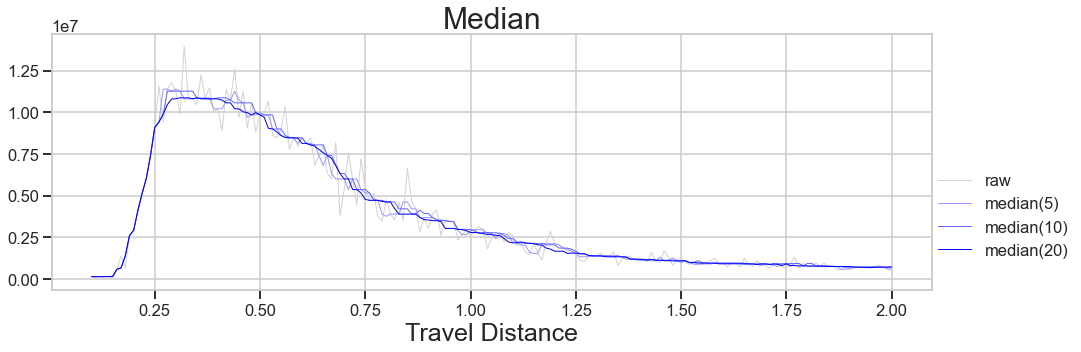

In [48]:
fig, ax = plt.subplots(ncols=1, figsize=(15,5))

raw_smooth = median(df['traffic'], 5)
raw_smooth2 = median(df['traffic'], 10)
raw_smooth3 = median(df['traffic'], 15)

ax.plot(df['dist_round'], df['traffic'], lw=1, c='lightgray', label='raw')
ax.plot(df['dist_round'], raw_smooth, lw=1, c='#9999FF', label="median(5)")
ax.plot(df['dist_round'], raw_smooth2, lw=1, c='#6666FF', label="median(10)")
ax.plot(df['dist_round'], raw_smooth3, lw=1, c='#0000FF', label="median(20)")

ax.set_title('Median', size=30)
ax.set_xlabel("Travel Distance", size=25)

plt.legend(loc=[1, 0.1])
plt.tight_layout()

### 3.2.2. Numpy Smoothing Options

In [49]:
methods = ['hanning', 'hamming', 'bartlett', 'blackman']

def hanning(raw, box_size):
    box = np.hanning(box_size)/np.sum(np.hanning(box_size))
    raw_smooth = np.convolve(box, raw, mode='same')
    return raw_smooth

def hamming(raw, box_size):
    box = np.hanning(box_size)/np.sum(np.hanning(box_size))
    raw_smooth = np.convolve(box, raw, mode='same')
    return raw_smooth

def bartlett(raw, box_size):
    box = np.hanning(box_size)/np.sum(np.hanning(box_size))
    raw_smooth = np.convolve(box, raw, mode='same')
    return raw_smooth

def blackman(raw, box_size):
    box = np.hanning(box_size)/np.sum(np.hanning(box_size))
    raw_smooth = np.convolve(box, raw, mode='same')
    return raw_smooth

def np_smooth(raw, method, box_size):
    w=eval(f'np.{method}(box_size)')
    raw_smooth = np.convolve(w/w.sum(), raw, mode='same')
    return raw_smooth

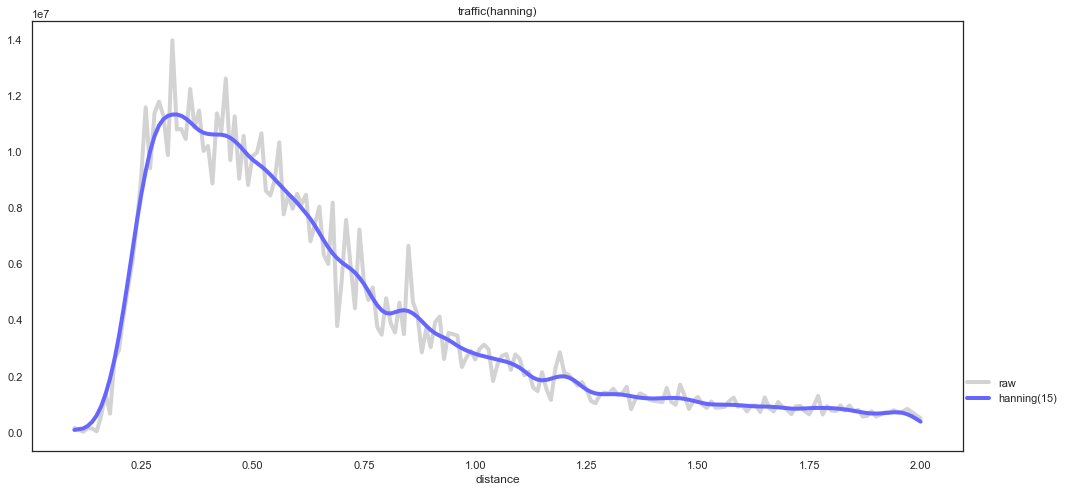

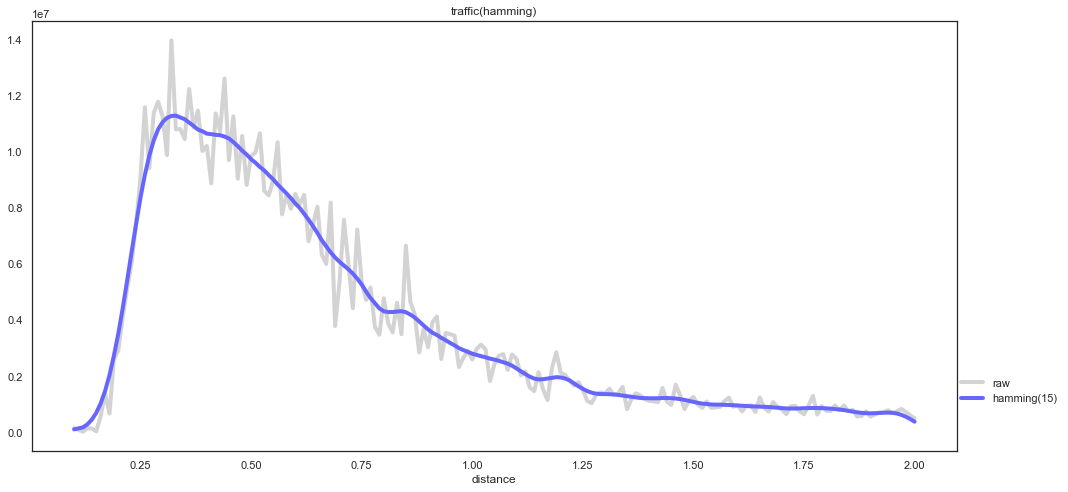

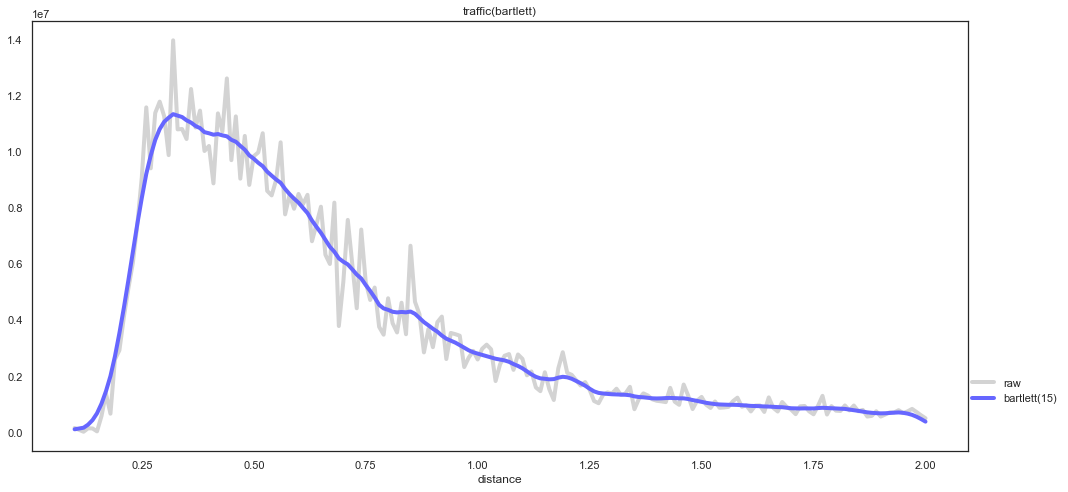

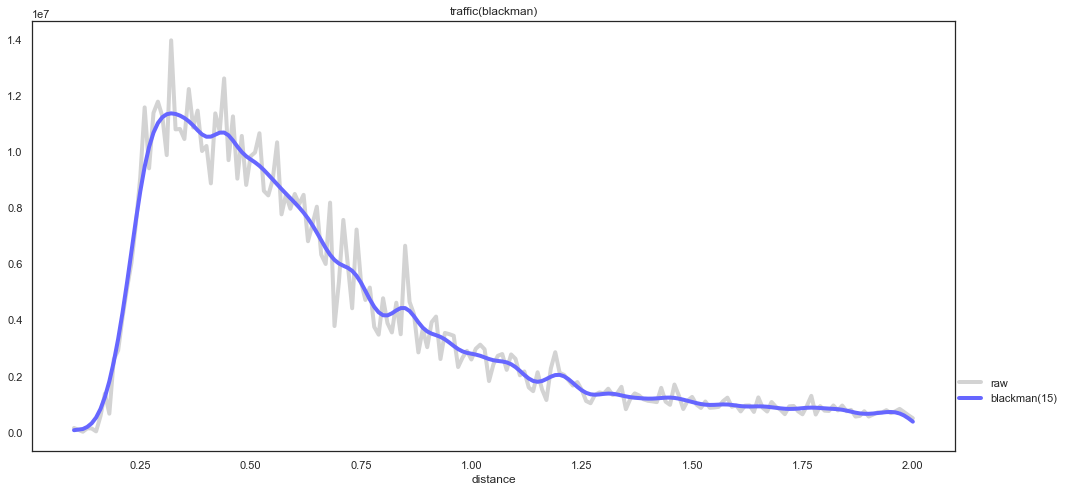

In [177]:
for method in methods:
    fig, ax = plt.subplots(ncols=1, figsize=(15,7))
    ax.plot(df['dist_round'], df['traffic'], lw=4, c='lightgray', label='raw')
#     ax.plot(df['dist_round'], np_smooth(df['traffic'], method, 5), lw=2, c='#9999FF', label=f'{method}(5)')
    ax.plot(df['dist_round'], np_smooth(df['traffic'], method, 15), lw=4, c='#6666FF', label=f'{method}(15)')
#     ax.plot(df['dist_round'], np_smooth(df['traffic'], method, 20), lw=2, c='#0000FF', label=f'{method}(21)')
    
    ax.set_title(f'traffic({method})')
    ax.set_xlabel('distance')
    
    plt.legend(loc=[1, 0.1])
    plt.tight_layout()


* 4개의 알고리즘 중 signal은 유지하면서 noise가 제거된 것을 골라내면 bartlett, blackman정도로 생각됨
* 두 개의 알고리즘을 같이 비교해 볼 필요성 있음

In [51]:
raw_smooth_bat = bartlett(df['traffic'], 15)

d1_bat = np.diff(raw_smooth_bat)/np.diff(df['dist_round'])        #1계도함수
d2_bat = np.diff(d1_bat)/np.diff(df['dist_round'].iloc[:-1])      #2계도함수
d3_bat = np.diff(d2_bat)/np.diff(df['dist_round'].iloc[:-2])      #3계도함수

In [52]:
raw_smooth_blm = blackman(df['traffic'], 15)

d1_blm = np.diff(raw_smooth_blm)/np.diff(df['dist_round'])        #1계도함수
d2_blm = np.diff(d1_blm)/np.diff(df['dist_round'].iloc[:-1])      #2계도함수
d3_blm = np.diff(d2_blm)/np.diff(df['dist_round'].iloc[:-2])      #3계도함수

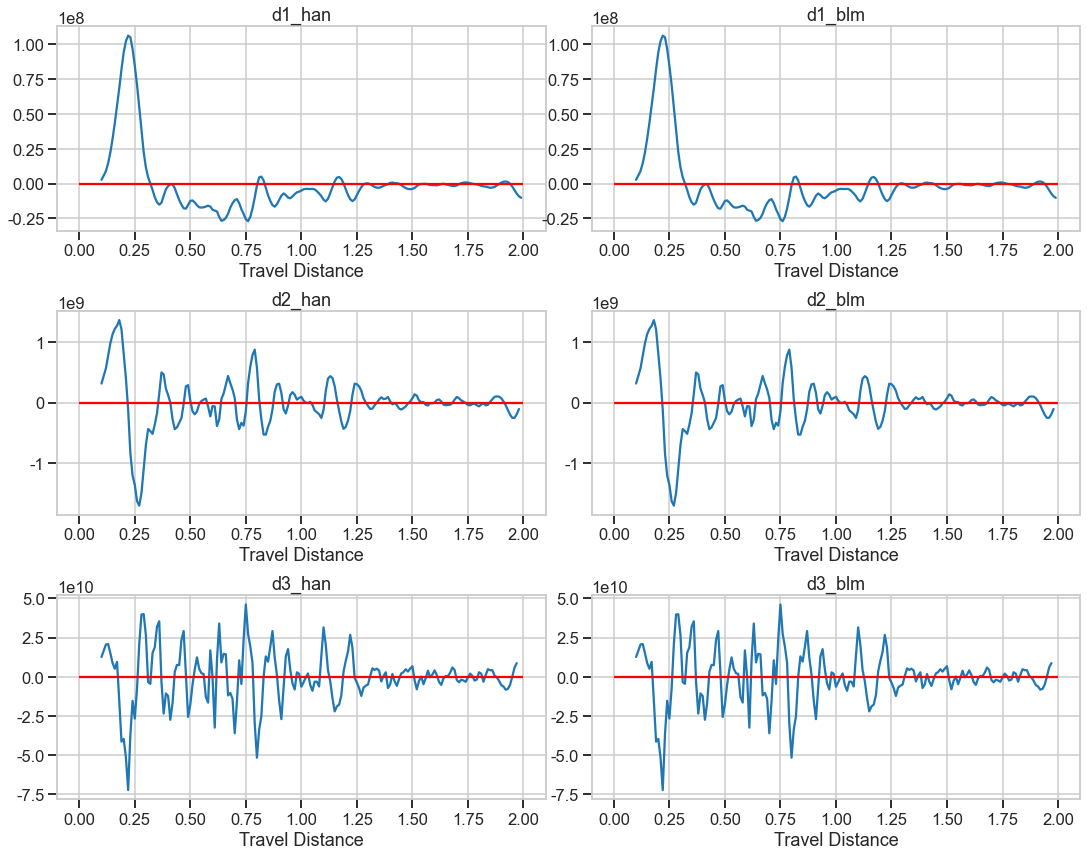

In [53]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize = (15,12))
ax[0][0].plot(df['dist_round'].iloc[:-1], d1_bat)
ax[1][0].plot(df['dist_round'].iloc[:-2], d2_bat)
ax[2][0].plot(df['dist_round'].iloc[:-3], d3_bat)


ax[0][0].hlines(0,0,2,color="red")
ax[1][0].hlines(0,0,2,color="red")
ax[2][0].hlines(0,0,2,color="red")

ax[0][0].set_title('d1_han')
ax[1][0].set_title('d2_han')
ax[2][0].set_title('d3_han')

ax[0][0].set_xlabel('Travel Distance')
ax[1][0].set_xlabel('Travel Distance')
ax[2][0].set_xlabel('Travel Distance')

ax[0][1].plot(df['dist_round'].iloc[:-1], d1_blm)
ax[1][1].plot(df['dist_round'].iloc[:-2], d2_blm)
ax[2][1].plot(df['dist_round'].iloc[:-3], d3_blm)

ax[0][1].hlines(0,0,2,color="red")
ax[1][1].hlines(0,0,2,color="red")
ax[2][1].hlines(0,0,2,color="red")

ax[0][1].set_title('d1_blm')
ax[1][1].set_title('d2_blm')
ax[2][1].set_title('d3_blm')

ax[0][1].set_xlabel('Travel Distance')
ax[1][1].set_xlabel('Travel Distance')
ax[2][1].set_xlabel('Travel Distance')

plt.tight_layout()

* 두개 다 별 차이는 없어 보이긴 하는데... 아직 도함수 노이즈가 많이 보이긴 함
* 다른 방법론 적용 필요

### 3.2.3. Savitzky-Golay filter application

In [54]:
from scipy.signal import savgol_filter as sg

In [55]:
def savgol(raw, box_size):
    raw_smooth = sg(raw, box_size, 4, mode='nearest')
    return raw_smooth

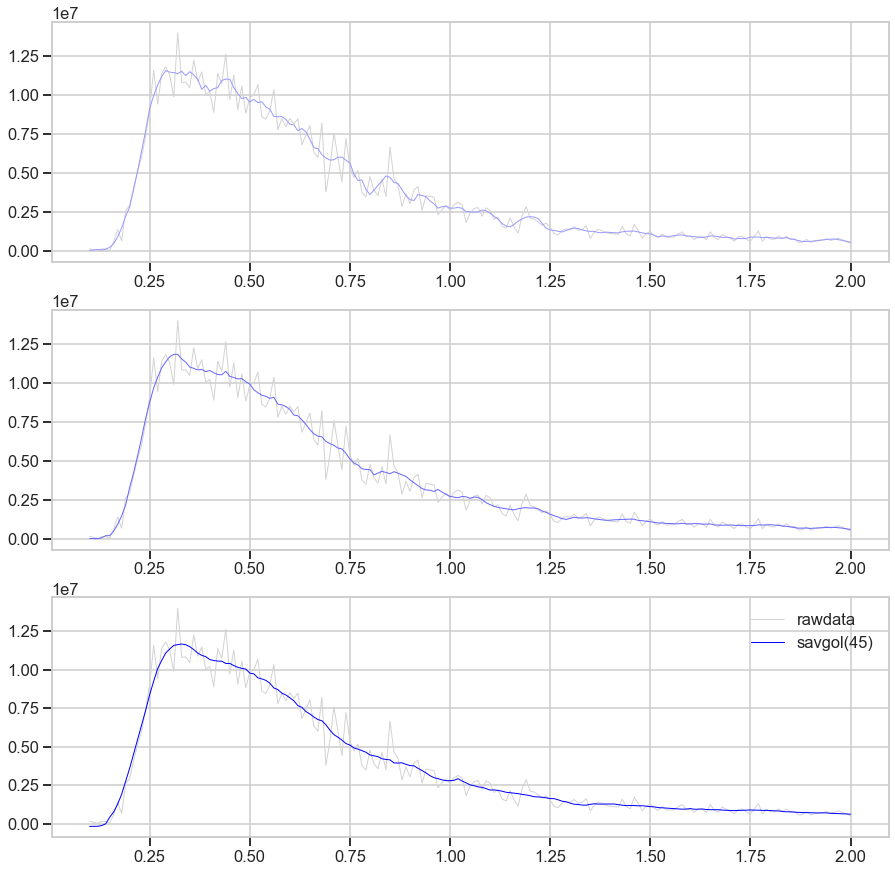

In [56]:
dfs = savgol(df['traffic'], 15)
dfs2 = savgol(df['traffic'], 25)
dfs3 = savgol(df['traffic'], 35)

fig, ax = plt.subplots(nrows=3, figsize=(15,15))

ax[0].plot(df['dist_round'], df['traffic'], lw=1, c='lightgray', label="rawdata")
ax[1].plot(df['dist_round'], df['traffic'], lw=1, c='lightgray', label="rawdata")
ax[2].plot(df['dist_round'], df['traffic'], lw=1, c='lightgray', label="rawdata")


ax[0].plot(df['dist_round'], dfs, lw=1, c='#9999FF', label="savgol(15)")
ax[1].plot(df['dist_round'], dfs2, lw=1, c='#6666FF', label="savgol(30)")
ax[2].plot(df['dist_round'], dfs3, lw=1, c='#0000FF', label="savgol(45)")

plt.legend()

In [57]:
d1_sav = np.diff(dfs3)/np.diff(df['dist_round'])                  #1계도함수
d2_sav = np.diff(d1_sav)/np.diff(df['dist_round'].iloc[:-1])      #2계도함수
d3_sav = np.diff(d2_sav)/np.diff(df['dist_round'].iloc[:-2])      #3계도함수

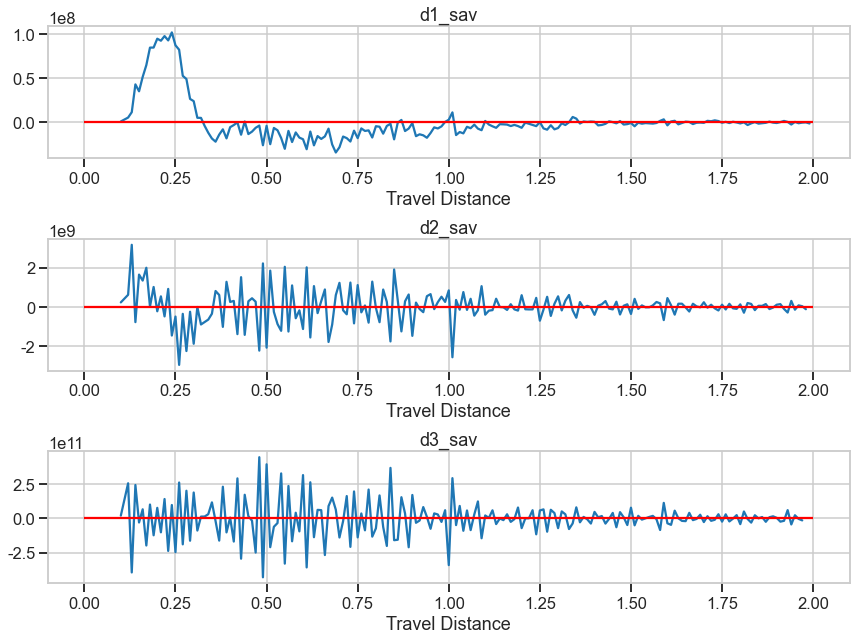

In [58]:
fig, ax = plt.subplots(nrows=3, figsize = (12,9))
ax[0].plot(df['dist_round'].iloc[:-1], d1_sav)
ax[1].plot(df['dist_round'].iloc[:-2], d2_sav)
ax[2].plot(df['dist_round'].iloc[:-3], d3_sav)

ax[0].hlines(0,0,2,color="red")
ax[1].hlines(0,0,2,color="red")
ax[2].hlines(0,0,2,color="red")

ax[0].set_title('d1_sav')
ax[1].set_title('d2_sav')
ax[2].set_title('d3_sav')

ax[0].set_xlabel('Travel Distance')
ax[1].set_xlabel('Travel Distance')
ax[2].set_xlabel('Travel Distance')

plt.tight_layout()

### 3.2.4. Data Quality Refinement
* 2, 3차 도함수에 average와 median을 추가해서 데이터를 정제

In [59]:
d1 = np.diff(df['traffic'])/np.diff(df['dist_round'])     #1계도함수
d2 = np.diff(d1)/np.diff(df['dist_round'].iloc[:-1])      #2계도함수
d3 = np.diff(d2)/np.diff(df['dist_round'].iloc[:-2])      #3계도함수

In [60]:
raw_smooth_blm = blackman(df['traffic'], 15)

d1_blm = np.diff(raw_smooth_blm)/np.diff(df['dist_round'])        #1계도함수
d2_blm_0 = np.diff(d1_blm)/np.diff(df['dist_round'].iloc[:-1])    #2계도함수
d2_blm = average(d2_blm_0, 9)
d3_blm_0 = np.diff(d2_blm)/np.diff(df['dist_round'].iloc[:-2])      #3계도함수
d3_blm = average(d3_blm_0, 9)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


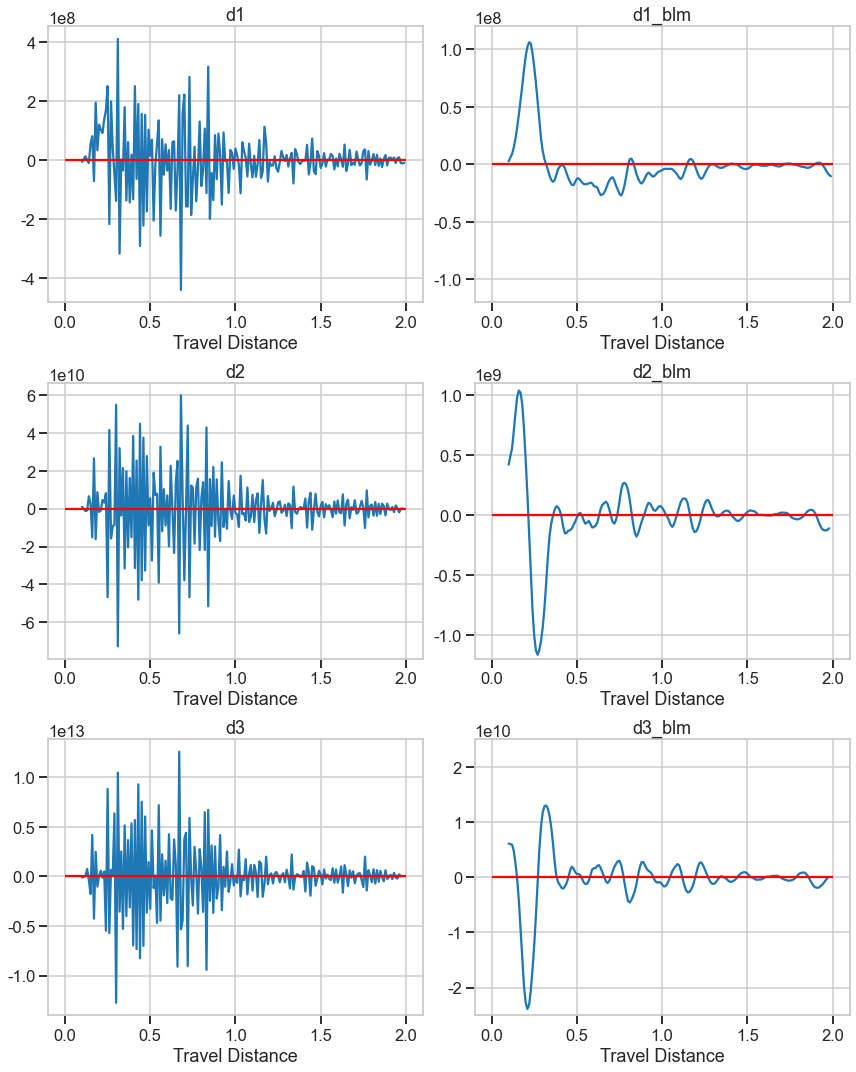

In [61]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize = (12,15))

ax[0][0].plot(df['dist_round'].iloc[:-1], d1, label='rawdata')
ax[1][0].plot(df['dist_round'].iloc[:-2], d2, label='rawdata')
ax[2][0].plot(df['dist_round'].iloc[:-3], d3, label='rawdata')
ax[0][1].plot(df['dist_round'].iloc[:-1], d1_blm)
ax[1][1].plot(df['dist_round'].iloc[:-2], d2_blm)
ax[2][1].plot(df['dist_round'].iloc[:-3], d3_blm)

ax[0][0].hlines(0,0,2,color="red")
ax[1][0].hlines(0,0,2,color="red")
ax[2][0].hlines(0,0,2,color="red")
ax[0][1].hlines(0,0,2,color="red")
ax[1][1].hlines(0,0,2,color="red")
ax[2][1].hlines(0,0,2,color="red")

ax[0][0].set_title('d1')
ax[1][0].set_title('d2')
ax[2][0].set_title('d3')
ax[0][1].set_title('d1_blm')
ax[1][1].set_title('d2_blm')
ax[2][1].set_title('d3_blm')

ax[0][0].set_xlabel('Travel Distance')
ax[1][0].set_xlabel('Travel Distance')
ax[2][0].set_xlabel('Travel Distance')
ax[0][1].set_xlabel('Travel Distance')
ax[1][1].set_xlabel('Travel Distance')
ax[2][1].set_xlabel('Travel Distance')

ax[0][1].set_ylim(-120000000,120000000)
ax[1][1].set_ylim(-1200000000,1100000000)
ax[2][1].set_ylim(-25000000000,25000000000)

plt.legend()
plt.tight_layout()

### 3.3 Inflection Point Detection

* 데이터가 정제되었으므로, 변곡점 찾는 과정 필요
* 도함수 표기도 Latex를 이용해 제대로 표시하기 위해 관련 폰트 설정

In [62]:
plt.rcParams['mathtext.fontset']='cm'
plt.rcParams['mathtext.default']='it'
font_title = {'fontsize':30,
             'fontweight': plt.rcParams['axes.titleweight'],
             'vertivalalignment': 'center',
             'horizontalalignment': 'center'}

### 3.3.1. Data Screening

* data로부터 변곡점을 걸러내기 위한 tolerance 설정
* physical meaning에 근거한 tolerance를 잡는 것이 바람직
* 일단은 눈에 보이는 극점 및 변곡점을 모두 포함하는 tolerances를 선택

In [63]:
d1_blm

array([ 2.73193762e+06,  9.02584694e+06,  1.46989196e+07,  2.24297981e+07,
        3.22460872e+07,  4.35649422e+07,  5.57554396e+07,  6.84582101e+07,
        8.21060320e+07,  9.42327110e+07,  1.02214054e+08,  1.06229213e+08,
        1.05085789e+08,  9.67071233e+07,  8.46079499e+07,  7.09717878e+07,
        5.46640710e+07,  3.76006619e+07,  2.26111554e+07,  1.15937526e+07,
        4.57438041e+06,  1.91697575e+05, -4.53645913e+06, -9.71985872e+06,
       -1.33702830e+07, -1.51365839e+07, -1.37024437e+07, -8.72699464e+06,
       -4.06843707e+06, -1.76602652e+06, -5.32595900e+05, -5.26499941e+05,
       -3.26977419e+06, -7.68937757e+06, -1.17848600e+07, -1.51227311e+07,
       -1.77176921e+07, -1.79612637e+07, -1.52885185e+07, -1.24090308e+07,
       -1.20977701e+07, -1.35512070e+07, -1.55042191e+07, -1.69868883e+07,
       -1.72340078e+07, -1.69737433e+07, -1.64901437e+07, -1.58284626e+07,
       -1.64658043e+07, -1.87511916e+07, -1.93501284e+07, -1.99868577e+07,
       -2.38736337e+07, -

In [64]:
d1tol = 2.91697575e+06

In [65]:
d2_blm

array([ 4.18733888e+08,  5.54183859e+08,  6.95325754e+08,  8.46968220e+08,
        9.81709097e+08,  1.03542453e+09,  1.01700325e+09,  9.18399903e+08,
        7.16233734e+08,  4.56033419e+08,  1.69070536e+08, -1.53268212e+08,
       -4.94504113e+08, -7.95795062e+08, -1.00689224e+09, -1.12949814e+09,
       -1.16548991e+09, -1.12492869e+09, -1.04808676e+09, -9.37134120e+08,
       -7.75562832e+08, -5.70034507e+08, -3.48201667e+08, -1.74024330e+08,
       -7.04489659e+07, -8.04770528e+06,  4.45551021e+07,  7.16676059e+07,
        6.31211709e+07,  3.72413758e+07, -1.57809716e+07, -9.98966385e+07,
       -1.54364740e+08, -1.50249911e+08, -1.31960388e+08, -1.28569669e+08,
       -1.14238142e+08, -8.68315728e+07, -5.78003142e+07, -2.34586297e+07,
        8.26609790e+06,  1.63457778e+07, -5.99937877e+06, -4.50752608e+07,
       -7.39269048e+07, -6.44324605e+07, -4.98070954e+07, -7.65193934e+07,
       -1.05102384e+08, -1.01551084e+08, -9.03141640e+07, -6.47378118e+07,
       -8.81555522e+06,  

In [66]:
d2tol = 3.69070536e+07

* 선택한 tolerance가 적절한지 임계값을 바꿔가면서 확인
* tolerance값에 수평선을 긋고, 그래프가 tolerance를 만족하는 부분을 색으로 칠해 가며 확인

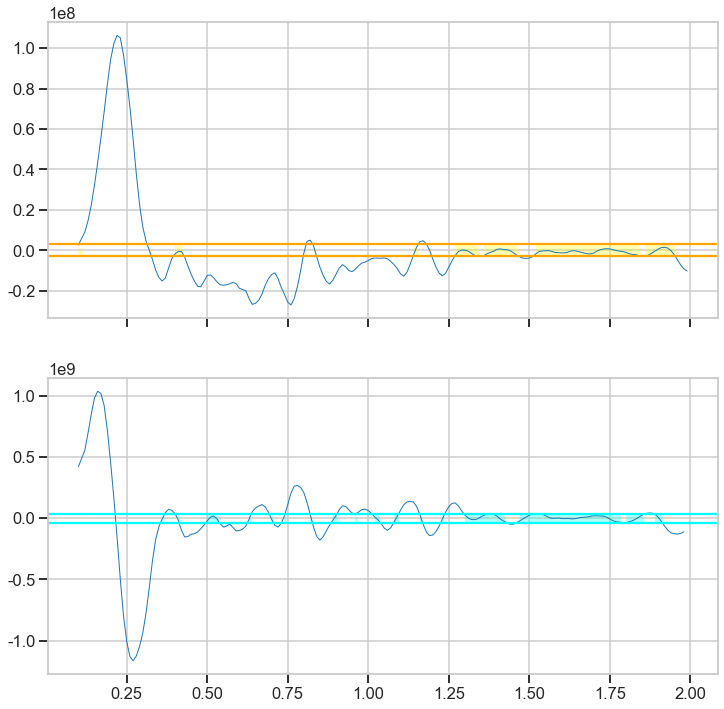

In [67]:
# 1. Visualization: Line
fig, ax = plt.subplots(nrows=2, figsize=(12, 12), sharex=True)

#- 1st derivative
ax[0].plot(df['dist_round'].iloc[:-1], d1_blm, lw=1, zorder=2)
ax[0].axhline(y=d1tol, c='orange')
ax[0].axhline(y=-d1tol, c='orange')
ax[0].fill_between(df['dist_round'].iloc[:-1], -d1tol, d1tol, 
                   where=abs(d1_blm) <= d1tol,
                   facecolor='yellow', interpolate=True, alpha=0.3)
ax[1].fill_between(df['dist_round'].iloc[:-1], -d1tol, d1tol, 
                   where=abs(d1_blm) <= d1tol,
                   facecolor='yellow', interpolate=True, alpha=0.3)

#- 2nd derivative
ax[1].plot(df['dist_round'].iloc[:-2], d2_blm, lw=1, zorder=2)
ax[1].axhline(y=-d2tol, c='cyan')
ax[1].axhline(y=d2tol, c='cyan')
ax[1].fill_between(df['dist_round'].iloc[:-2], -d2tol, d2tol, 
                   where=abs(d2_blm) <= d2tol,
                   facecolor='cyan', interpolate=True, alpha=0.3)

### 3.3.2. Inflection Point Detection
* 전체 곡선 중 위에서 선택한 데이터만을 분리
* list comprehension 사용

In [68]:
screen1 = np.where(abs(d1_blm) <= d1tol)[0]
screen2 = np.where(abs(d2_blm) <= d1tol)[0]

inflection = np.array([i for i in screen1 if i in screen2])

In [69]:
screen1

array([  0,  21,  29,  30,  31,  69,  72, 103, 104, 108, 116, 117, 118,
       119, 120, 121, 122, 123, 125, 126, 127, 128, 129, 130, 131, 132,
       133, 134, 135, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150,
       151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163,
       164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 175, 176, 177,
       178, 179, 180, 181, 182, 183, 184], dtype=int64)

* **극점이 될 수 있는 후보들(위쪽 그래프)** 와 **변곡점이 될 수 있는 후보들(아래쪽 그래프)** 들 그래프 상에 점으로 표시

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


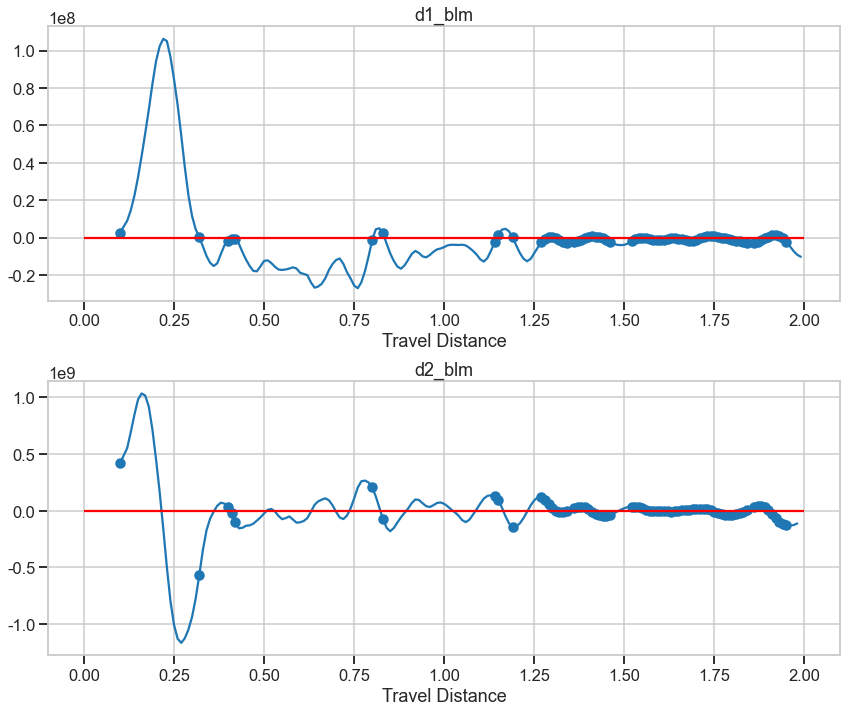

In [70]:
fig, ax = plt.subplots(nrows=2, figsize = (12,10))

ax[0].plot(df['dist_round'].iloc[:-1], d1_blm)
ax[1].plot(df['dist_round'].iloc[:-2], d2_blm)

ax[0].scatter(df['dist_round'].iloc[screen1], d1_blm[screen1])
ax[1].scatter(df['dist_round'].iloc[screen1], d2_blm[screen1])

ax[0].hlines(0,0,2,color="red")
ax[1].hlines(0,0,2,color="red")

ax[0].set_title('d1_blm')
ax[1].set_title('d2_blm')

ax[0].set_xlabel('Travel Distance')
ax[1].set_xlabel('Travel Distance')

plt.legend()
plt.tight_layout()

### 3.3.3. Clustering
* 극점이 될 수 있는 후보들을 찾았으니 실제 극점을 찾기 위해서는 구간별로 분리해야 함
* Unsupervisied learning 중 clustering 기법이 사용될 수 있으며,</br>
  데이터 사이의 거리가 아닌 클러스터 사이의 거리를 기준으로 나누는 DBSCAN 기법이 적용
* 일정 거리(eps) 안에 특정 개수(min_samples)이상의 데이터가 있으면 하나의 클러스터로 인식
* 각 클러스터마다 1차 도함수의 절대값이 가장 작은 지점을 대표점으로 추출(0과 가장 가까워야 하므로)

In [181]:
plt.style.use("seaborn-whitegrid")

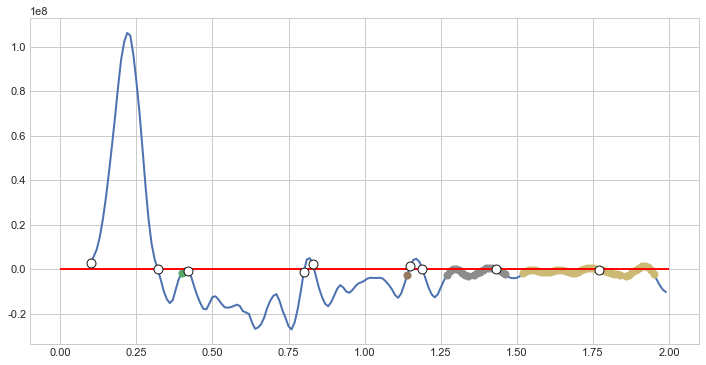

In [184]:
from sklearn.cluster import DBSCAN
eps=2.5e-2
min_samples=1

# 데이터를 clustering하기 좋은 형태로 변형합니다.
pl = np.array(df['dist_round'].iloc[screen1]).reshape((-1,1))  

# DBSCAN clustering을 수행합니다. 
clusters = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1).fit(pl)
ncluster = len(np.unique(clusters.labels_))

# cluster representation point 추출
phase_trs = []
for cluster in range(ncluster):
    cl_idx = screen1[clusters.labels_ == cluster][0]
    phase_tr = cl_idx + abs(d1_blm[screen1][clusters.labels_ == cluster]).argmin()
    phase_trs.append(phase_tr)

phase_trs = np.array(phase_trs)

# Visualization: clusters
fig, ax = plt.subplots(ncols=1, figsize=(12, 6), sharex=True)

ax.plot(df['dist_round'].iloc[:-1], d1_blm, lw=2, zorder=2)

for cluster in range(ncluster):
    cl_idx = screen1[clusters.labels_ == cluster]
    ax.hlines(0,0,2,color="red", alpha=0.4, zorder=4)    
    # clusters
    ax.scatter(df['dist_round'].iloc[cl_idx], d1_blm[cl_idx], s=50,  zorder=3)
    
    # phase transition points
    ph_idx = phase_trs[cluster]
    ax.scatter(df['dist_round'].iloc[ph_idx], d1_blm[ph_idx], s=80, c='w', ec='k', zorder=5)


### 3.4. Inflection Point Detection Summary

### 3.4.1. Visualization
* plot상에 극점 표현
* 그래프의 일부 부분을 확대해서 원 그래프 안에 넣기도 하는데, 이를 보통 **inset**이라고 표현
* matplotlib에서는 inset_axis를 이용해 inset을 삽입
* line과 scatter 등 그래프를 겹쳐 그릴 때 어떤 그래프가 위에 오게 할 지는 **zorder**로 결정

(0.0, 1.0)

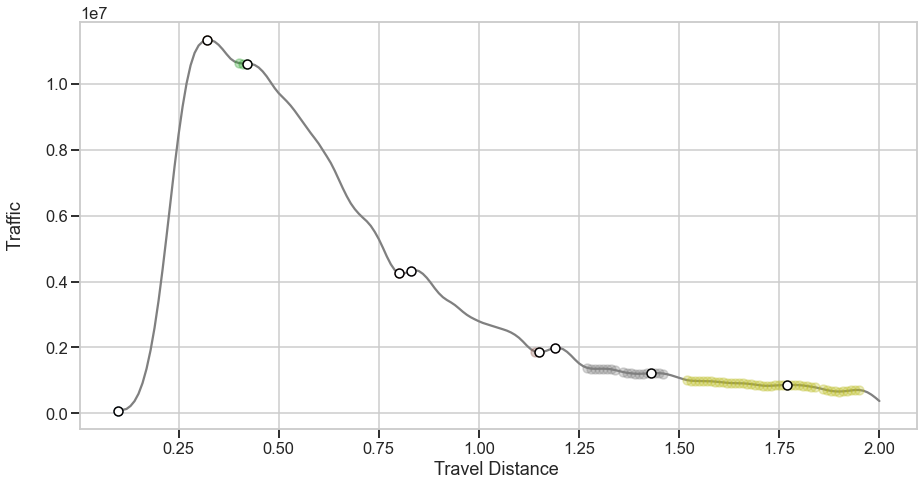

In [77]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig, ax = plt.subplots(figsize=(15,7.5))
# axin = inset_axes(ax, width=5, height=2.5)

ax.plot(df['dist_round'], raw_smooth_blm, c='gray', zorder=1)
# axin.plot(df['dist_round'], raw_smooth_blm, c='gray', zorder=1)

for cluster in range(ncluster):
    # clusters
    cl_idx = screen1[clusters.labels_ == cluster]
    ax.scatter(df['dist_round'].iloc[cl_idx], raw_smooth_blm[cl_idx], s=80, c=f'C{cluster}', alpha=0.3, zorder=2)
#     axin.scatter(df['dist_round'].iloc[cl_idx], raw_smooth_blm[cl_idx], s=80, alpha=0.3, zorder=2)
  
    # phase transition points
    ph_idx = phase_trs[cluster]
    ax.scatter(df['dist_round'].iloc[ph_idx], raw_smooth_blm[ph_idx], s=80, c='w', ec='k', zorder=2)
#     axin.scatter(df['dist_round'].iloc[ph_idx], raw_smooth_blm[ph_idx], s=50, c='w', ec='k', zorder=2)

# ax.set_xlim((-10, 400))    
# ax.set_ylim((0, 2.5))    
ax.set_xlabel('Travel Distance ')
ax.set_ylabel(' Traffic ', rotation=90, labelpad=20)

axin.set_xlim((0, 1))    
# axin.set_ylim((1, 2))  

### 3.4.2 극점 추출

In [78]:
point = {'tr_dist': df['dist_round'].iloc[phase_trs],
        'tr_traffic': raw_smooth_blm[phase_trs]}
point_s = pd.DataFrame(data = point). reset_index(drop=True)
point_s

,tr_dist,tr_traffic
0,0.10,7.665831e+04
1,0.32,1.132508e+07
2,0.42,1.061140e+07
3,0.80,4.244148e+06
4,0.83,4.326114e+06
5,1.15,1.846949e+06
6,1.19,1.986576e+06
7,1.43,1.215947e+06
8,1.77,8.639150e+05


In [109]:
df

,dist_round,traffic
0,0.10,147042
1,0.12,13570
2,0.13,136320
3,0.14,130801
4,0.15,26213
...,...,...
185,1.96,740278
186,1.97,827570
187,1.98,716848
188,1.99,601169


* 그래프가 감소하는 기점은 0.32m로 나타남

# II. Regression

## 1. Data Exploration

## 2. Regression

## 3. Validation

### 1 Load Data

### 1.1. 데이터 불러오기

In [79]:
os.getcwd()

'F:\\trafficdist_seoul\\o_weekdays\\boxplot_ddply\\type_gender_age_time_traffic_dist'

In [81]:
df_reg = pd.read_csv('df_reg2.csv')
df_reg

,dist_round3,traffic
0,0.102,147042
1,0.121,13570
2,0.131,35502
3,0.132,65510
4,0.135,35308
...,...,...
173,0.326,584915
174,0.327,946546
175,0.328,1105692
176,0.329,1759832


In [82]:
df_reg[df_reg['dist_round3']>0.28]

,dist_round3,traffic
128,0.281,1113681
129,0.282,1930146
130,0.283,689333
131,0.284,1391709
132,0.285,2641900
133,0.286,880315
134,0.287,2449253
135,0.288,1123566
136,0.289,1287008
137,0.290,913109


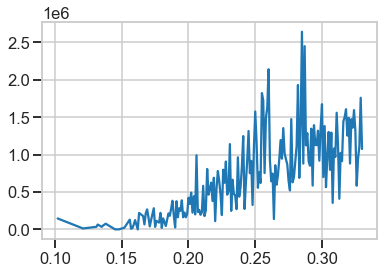

In [83]:
plt.plot(df_reg['dist_round3'], df_reg['traffic'])

C:\Users\ekqls\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


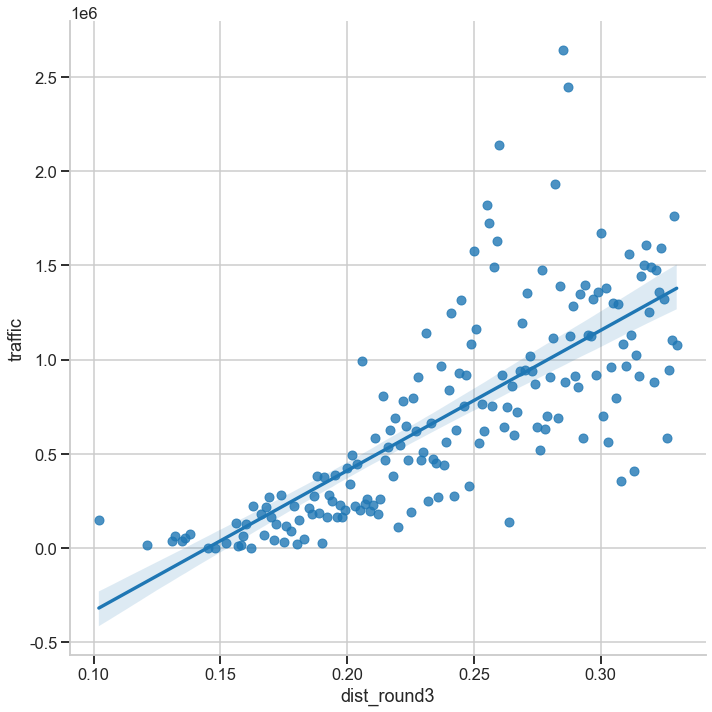

In [84]:
sns.lmplot(x="dist_round3", y="traffic", data=df_reg, size=10)

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [91]:
x_train, x_test, y_train, y_test = train_test_split(df_reg['dist_round3'], df_reg['traffic'])

In [92]:
x_train = x_train.to_numpy().reshape(-1, 1)
x_test = x_test.to_numpy().reshape(-1, 1)

In [93]:
y_train = np.log(y_train)
y_test = np.log(y_test)

In [105]:
model = LinearRegression()
pred = model.fit(x_train, y_train).predict(x_test)

model.coef_, model.intercept_
# pred

(array([18.88886258]), 8.496912196696545)

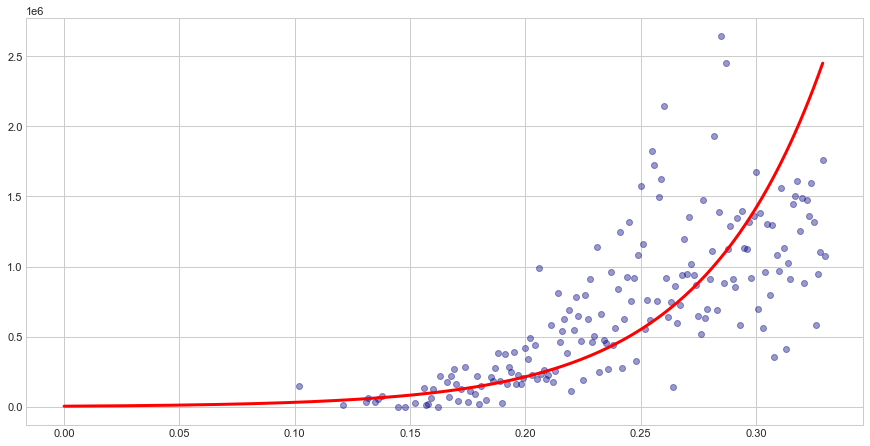

In [185]:
xs = np.arange(0,0.33, 0.001)
ys = np.exp(xs*model.coef_[0] + model.intercept_) - 0.01

fig, ax = plt.subplots(figsize=(15,7.5))

plt.scatter(df_reg['dist_round3'], df_reg['traffic'], c='navy', alpha=0.4)
plt.plot(xs,ys,'red',lw=3)

# III. Affinitny Test

In [ ]:
dtff = 